## imports

In [1]:
from numpy import fft
import scipy.io as io
from matplotlib import pyplot
import copy
import ipywidgets as ipw

## function definitions

In [2]:
# function for drawing two images next to each other:
def kSpaceFFT(kSpace):
    "Transform a matlab s-space matrix into an image"
    return fft.fftshift(fft.ifft2(fft.ifftshift(kSpace)))

def show2(img1, img2):
    "draw two images next to each other"
    pyplot.close()
    pyplot.figure(figsize=(50,50))

    pyplot.set_cmap(pyplot.gray())

    # draw k-space
    ax = pyplot.subplot(1,2,1)
    ax.imshow(abs(img1))

    ax = pyplot.subplot(1,2,2)
    ax.imshow(abs(img2))

    pyplot.show()
    
def trimSpace(first_row,step_size):
    kSpaceOrig = kSpace[first_row::step_size,:]
    print(kSpaceOrig.shape)
    img = kSpaceFFT(kSpaceOrig)
    show2(kSpaceOrig, img)

# Image Acquisition in k-space
$$
S (\vec{k}) = \int M (\vec{r}) e^{2\pi i \vec{k}\vec{r}} d\vec{r} 
\leftrightarrow_{\text{FT}}
M(\vec{r}) = \int S(\vec{k})e^{-2\pi i \vec{k}\vec{r}}d\vec{r}
$$

$$
\vec{k}(t) = \frac{1}{2\pi} \gamma\int_0^t \vec{G}(t')dt'
$$

In [3]:
# load data:
data = io.loadmat('k_space_3T_body_res.mat')
kSpace = data['k_space_3T_body_res']
img = kSpaceFFT(kSpace)
ipw.interact(trimSpace, first_row=(1,3,1), step_size=(1,4,1));

## high frequency horiziontal lines in k-space
results in vertical line in image space

In [4]:
def draw_kspace_lineV(x):
    kSpaceTmp = kSpace.copy()
    kSpaceTmp[x,:] = kSpace.max()
    kSpaceTmp[img.shape[1]-x,:] = kSpace.max()/2 # just for the symmetry
    imgTmp = kSpaceFFT(kSpaceTmp)
    show2(kSpaceTmp, imgTmp)
    
ipw.interact(draw_kspace_lineV, x=(0,int(img.shape[1]/2),10));

## high frequency "block" in k-space
Note: aliasing effects on the raspberry

In [5]:
def blockSpace(x,y,size):
    kSpaceTmp = kSpace.copy()
    kSpaceTmp[x:x+size,y:y+size] = kSpace.max()
    # ignoring the symmetry
    imgTmp = kSpaceFFT(kSpaceTmp)
    show2(kSpaceTmp, imgTmp)

ipw.interact(blockSpace, x=(0,int(img.shape[1]),10), y=(0,int(img.shape[0]*2),10), size=(1,50,1));

## low frequency block in center

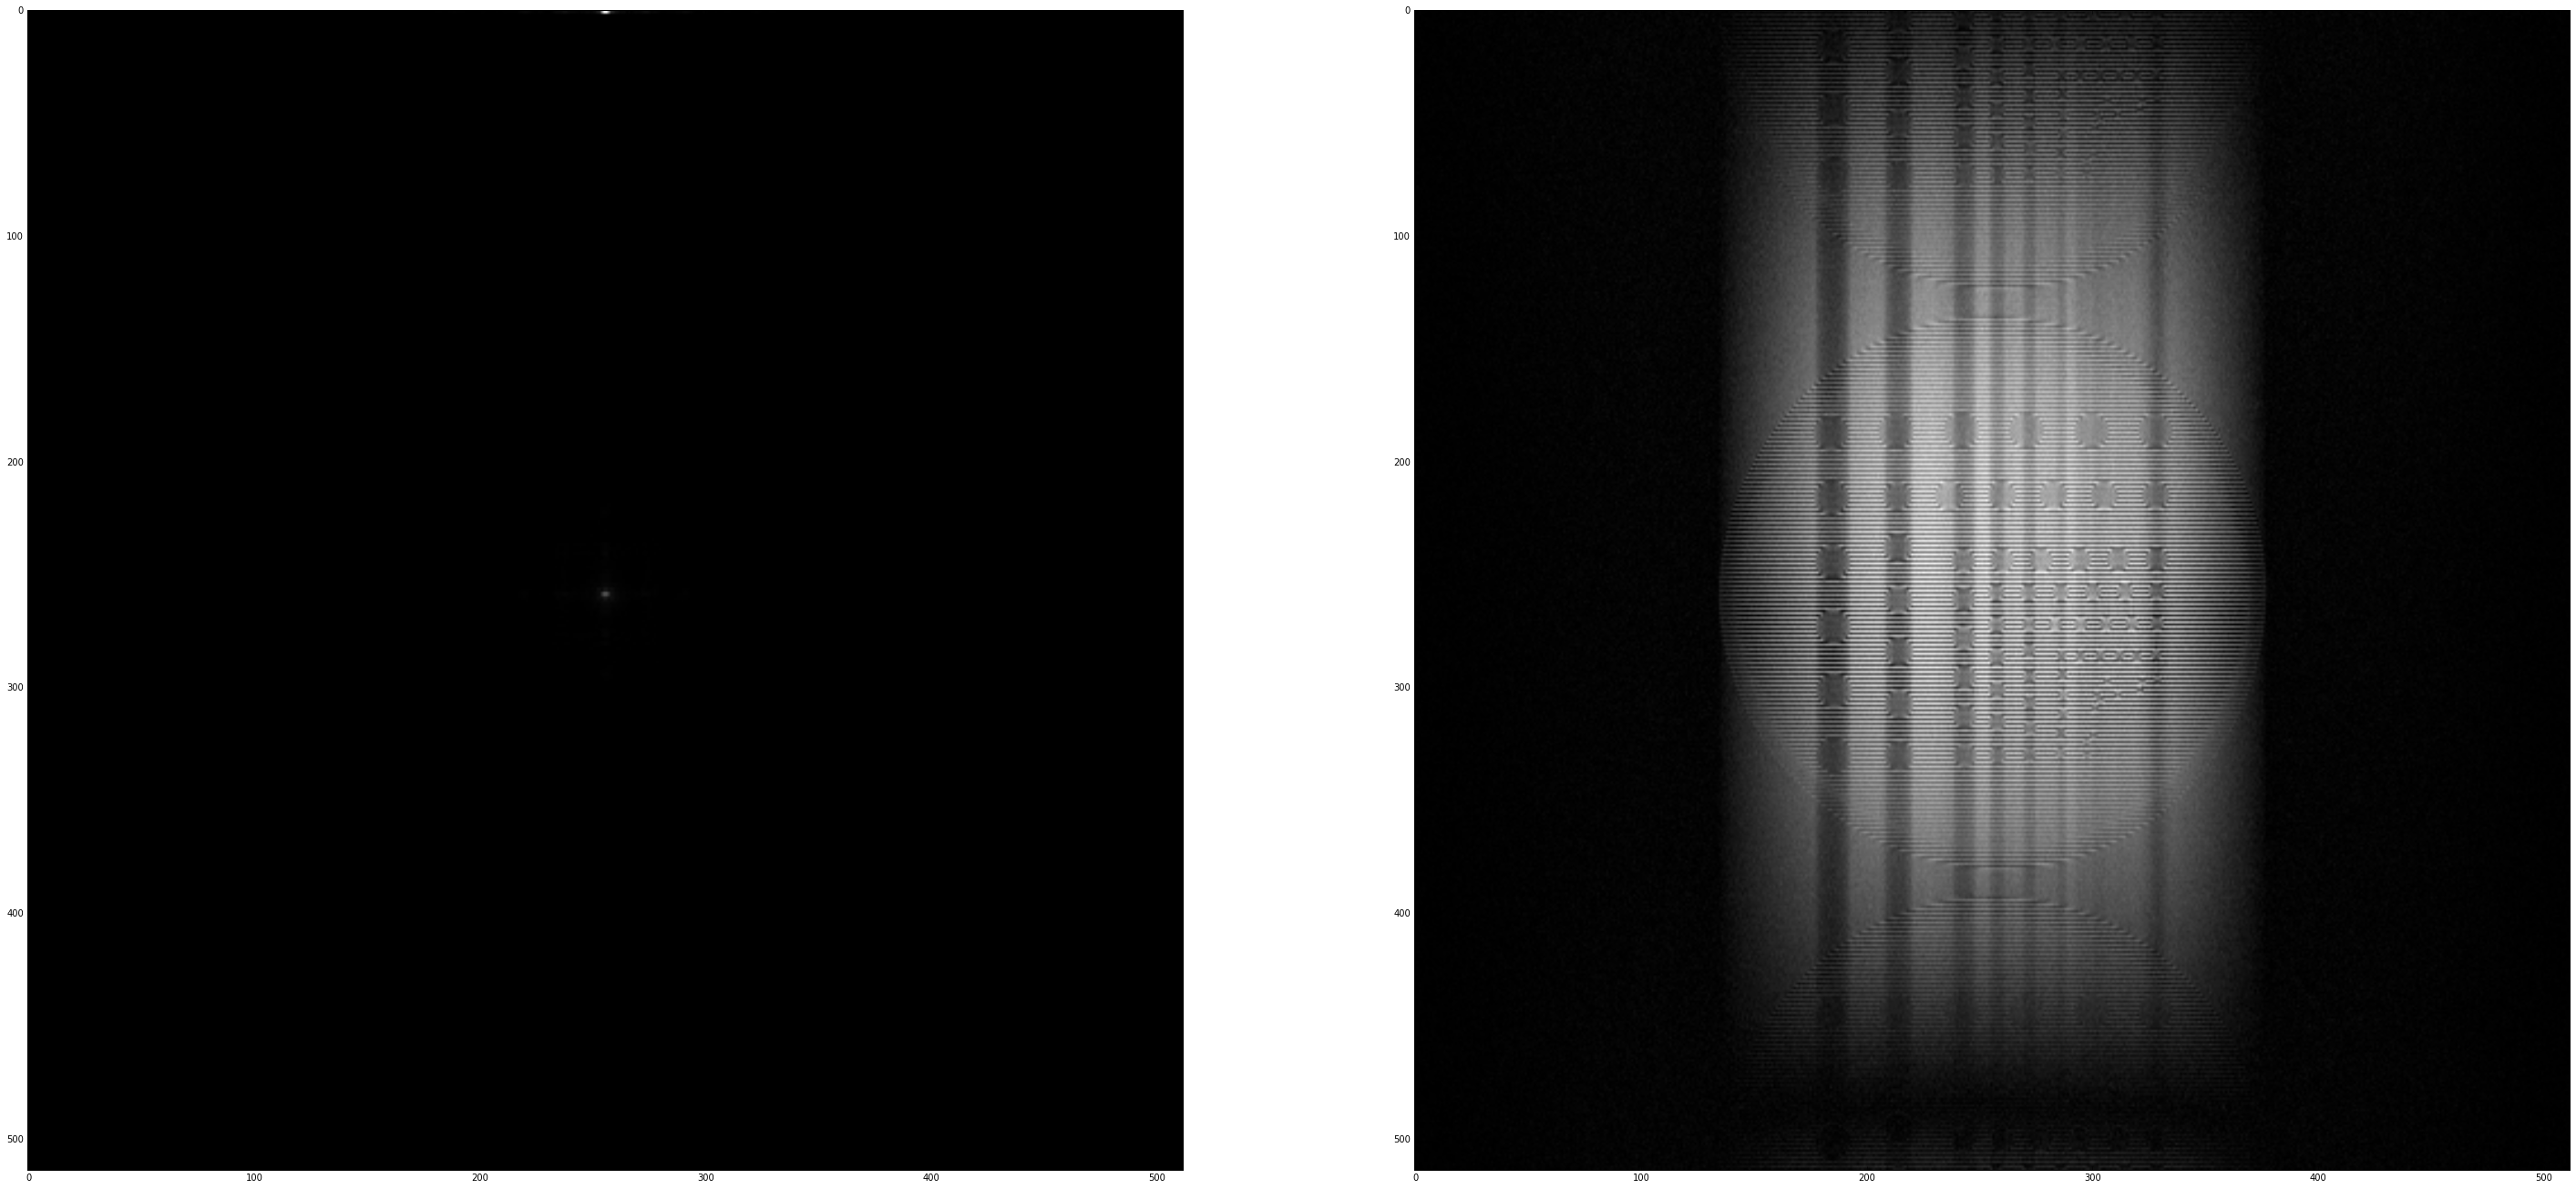

In [6]:
kSpaceTmp = kSpace.copy()
kSpaceTmp[500:524,1000:1048] = kSpace.max()
# ignoring the symmetry
imgTmp = kSpaceFFT(kSpaceTmp)
show2(kSpaceTmp, imgTmp)